In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import itertools
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

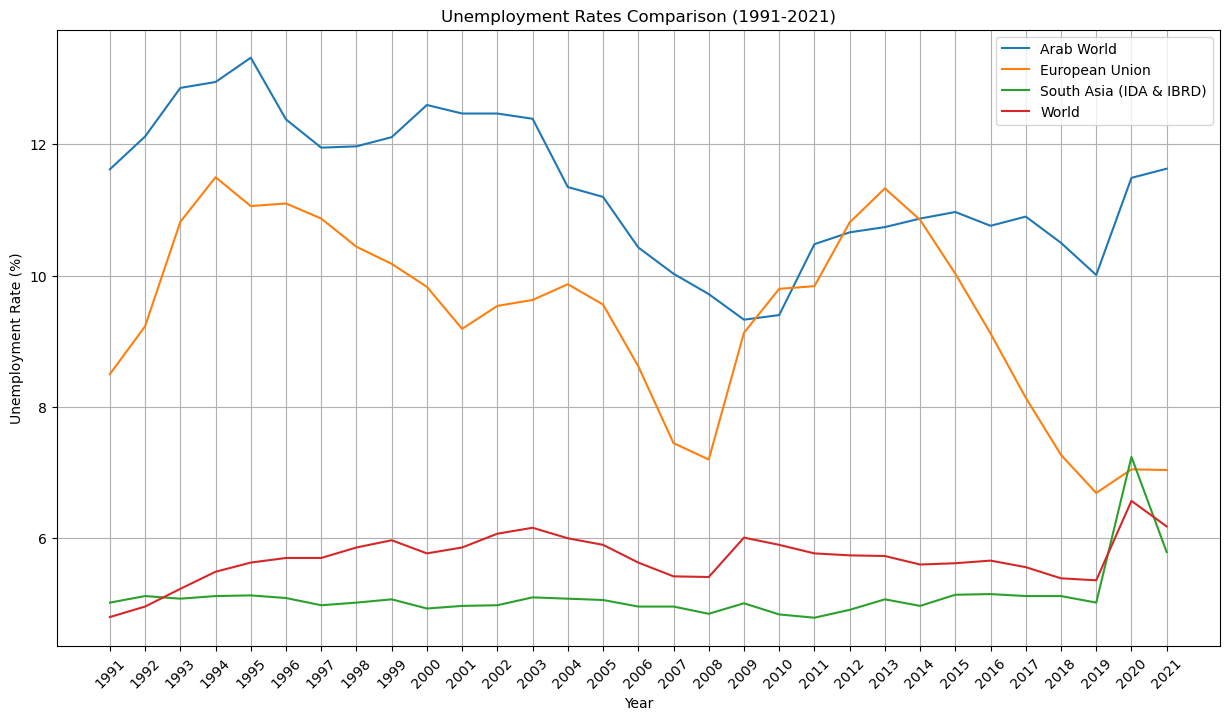

In [55]:
# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jsingh1998/Python_project/main/unemp_regions.csv'
df_region = pd.read_csv(file_path)

# Filtering the data for the specified regions: Arab World, European Union, South Asia (IDA & IBRD)
specific_regions = ['World','Arab World', 'European Union', 'South Asia (IDA & IBRD)']
final_df_region = df_region[df_region['Region Name'].isin(specific_regions)]

# Adding a 'Rest of the World' category by averaging the data of all other regions
#rest_of_world_df_region = df_region[~df_region['Region Name'].isin(specific_regions)]
#rest_of_world_df_region = rest_of_world_df_region.mean().to_frame().T
#rest_of_world_df_region['Region Name'] = 'Rest of the World'

# Concatenating the specific regions with the rest of the world
#final_df_region = pd.concat([filtered_df_region, rest_of_world_df_region])

# Reordering the columns to have 'Region Name' first
#final_df_region = final_df_region[['Region Name'] + [col for col in final_df_region.columns if col != 'Region Name']]

# Plotting the unemployment rates
plt.figure(figsize=(15, 8))
for region in final_df_region['Region Name']:
    plt.plot(final_df_region.columns[1:], final_df_region[final_df_region['Region Name'] == region].iloc[0, 1:], label=region)

plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.title('Unemployment Rates Comparison (1991-2021)')
plt.legend()
plt.grid(True)
plt.show()

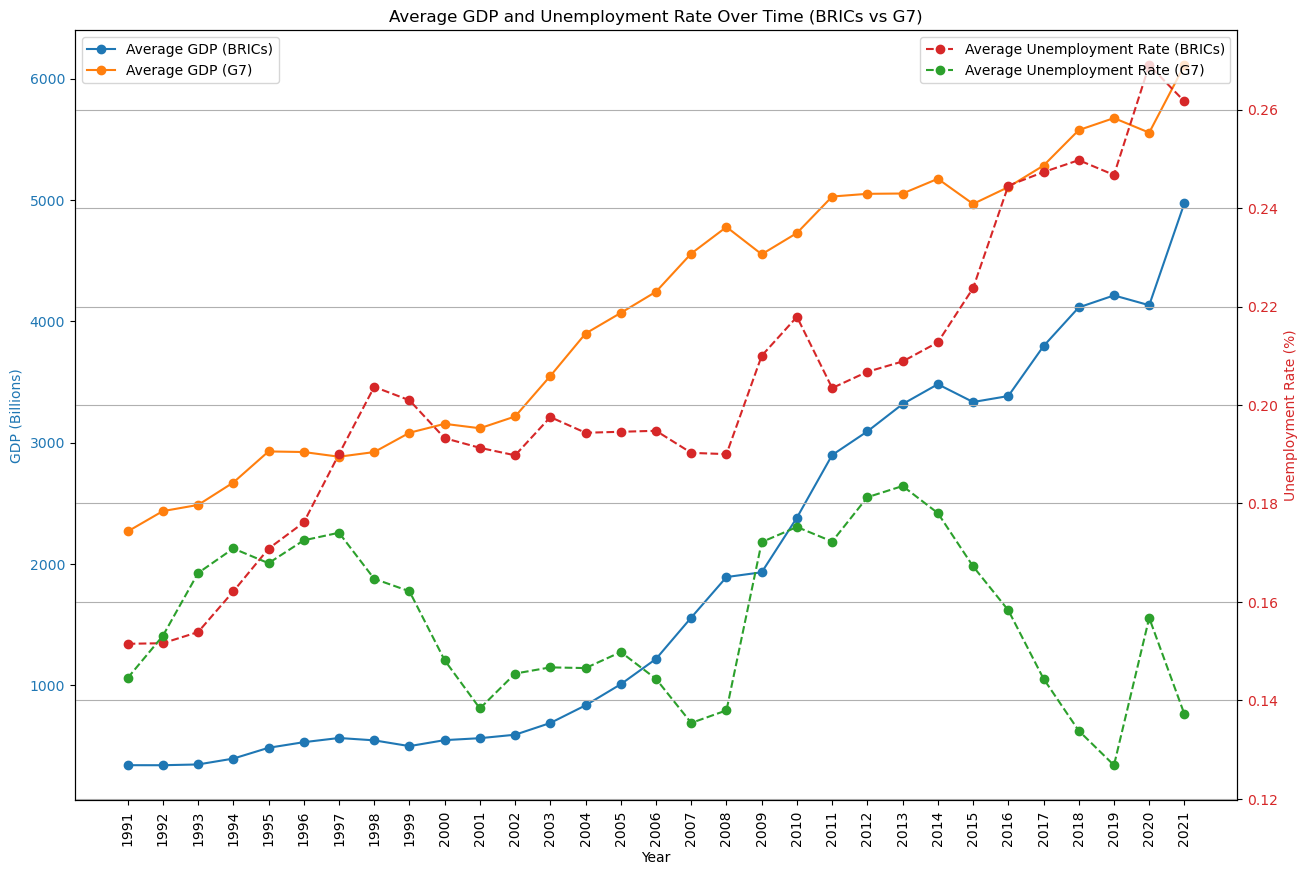

In [56]:
# URLs for the CSV files
gdp_url = "https://raw.githubusercontent.com/sriramganesh05/python_project/main/G7_BRICs_GDP_1991_2021.csv"
yur_url = "https://raw.githubusercontent.com/sriramganesh05/python_project/main/G7_BRICs_YUR_1991_2021.csv"

# Read data from CSV files, specifying that non-numeric values should be treated as NaN
gdp_data = pd.read_csv(gdp_url, index_col='Country Name', na_values=['..'])
yur_data = pd.read_csv(yur_url, index_col='Country Name', na_values=['..'])

# Convert data to numeric values
gdp_data = gdp_data.apply(pd.to_numeric, errors='coerce')
yur_data = yur_data.apply(pd.to_numeric, errors='coerce')

# Separate BRICs and G7 countries
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']

# Calculate average GDP and unemployment rate for BRICs
avg_gdp_brics = gdp_data.loc[brics_countries].mean()
avg_unemployment_brics = yur_data.loc[brics_countries].mean()

# Calculate average GDP and unemployment rate for G7
avg_gdp_g7 = gdp_data.loc[g7_countries].mean()
avg_unemployment_g7 = yur_data.loc[g7_countries].mean()

# Set up the figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot average GDP of BRICs on the first y-axis
ax1.plot(avg_gdp_brics.index, avg_gdp_brics.values, label='Average GDP (BRICs)', marker='o', linestyle='-', color='tab:blue')
ax1.plot(avg_gdp_g7.index, avg_gdp_g7.values, label='Average GDP (G7)', marker='o', linestyle='-', color='tab:orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Billions)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Create a second y-axis for unemployment rate
ax2 = ax1.twinx()
ax2.plot(avg_unemployment_brics.index, avg_unemployment_brics.values, label='Average Unemployment Rate (BRICs)', marker='o', linestyle='--', color='tab:red')
ax2.plot(avg_unemployment_g7.index, avg_unemployment_g7.values, label='Average Unemployment Rate (G7)', marker='o', linestyle='--', color='tab:green')
ax2.set_ylabel('Unemployment Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Rotate x-axis tick labels
ax1.set_xticks(avg_gdp_brics.index)
ax1.set_xticklabels(avg_gdp_brics.index, rotation=90, ha="center")

# Set title
plt.title('Average GDP and Unemployment Rate Over Time (BRICs vs G7)')

# Display the plot
plt.grid(True)
plt.show()

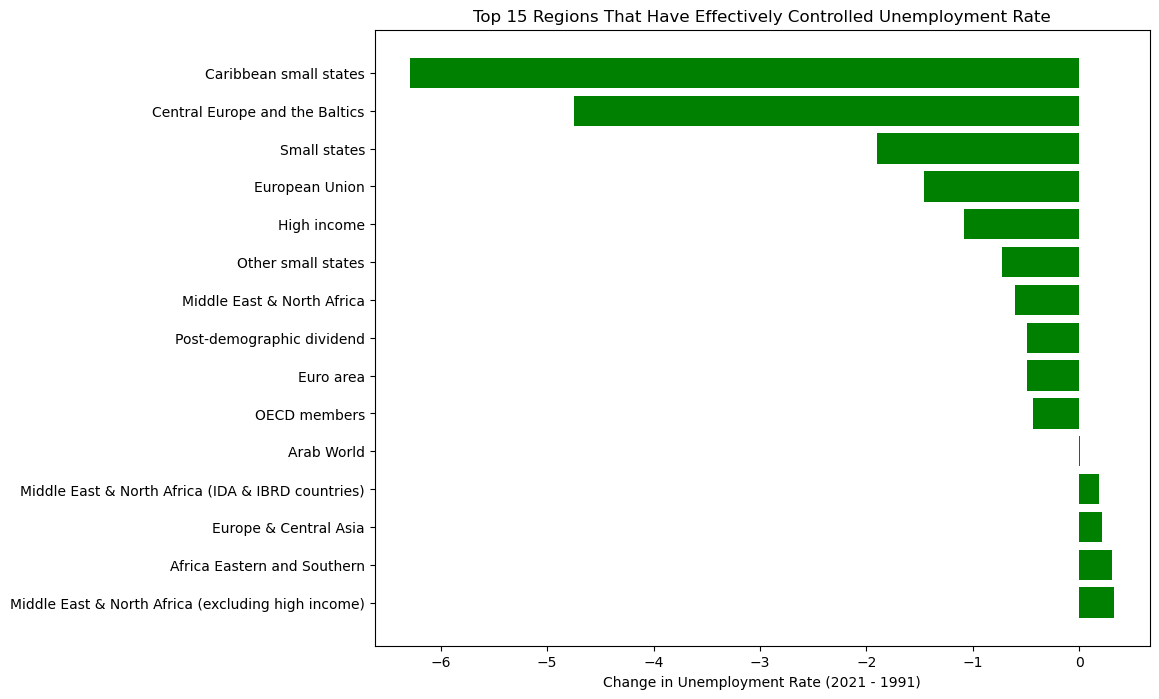

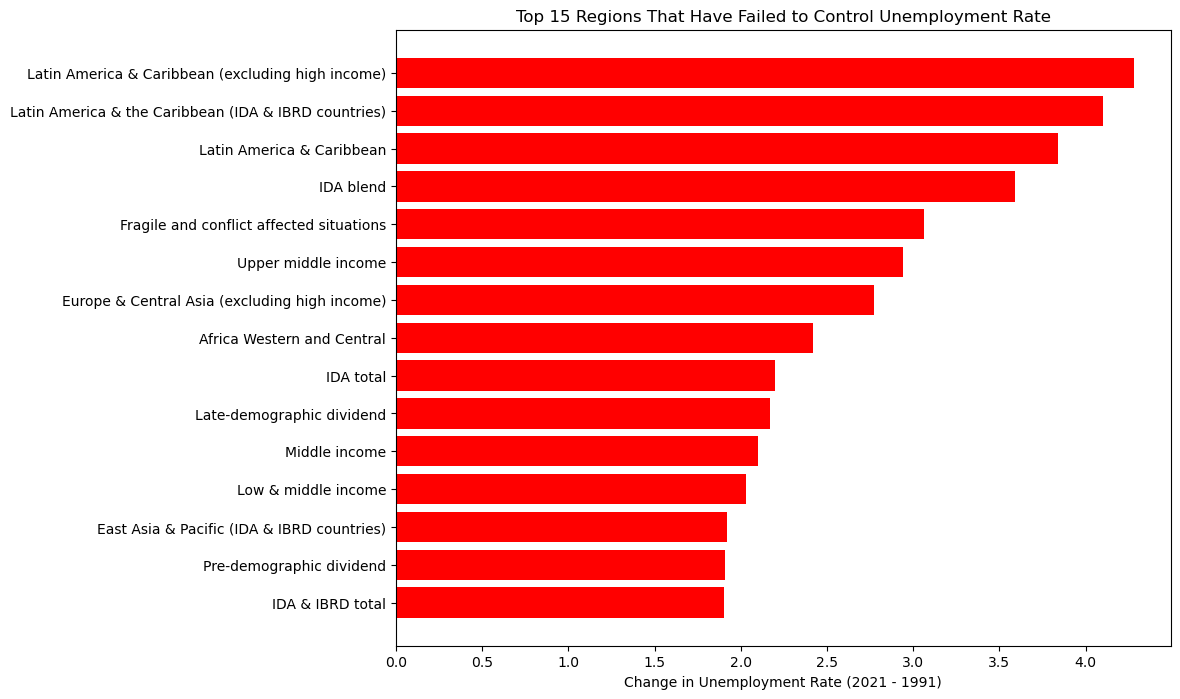

In [57]:
# Assuming 'df_region' is your DataFrame and it contains a column for regions named 'Region Name'
# and columns for each year with unemployment rates.

# Calculate the difference in unemployment rates between 2021 and 1991 for each region
df_region['Unemployment Change'] = df_region['2021'] - df_region['1991']

# Sort the regions by the change in unemployment rate
# Top 15 regions that have effectively controlled the unemployment rate (biggest decrease)
top_controlled = df_region.sort_values('Unemployment Change').head(15)

# Top 15 regions that have failed to control the unemployment rate (biggest increase)
top_failed = df_region.sort_values('Unemployment Change', ascending=False).head(15)

# Plotting the top 15 regions that have effectively controlled the unemployment rate
plt.figure(figsize=(10, 8))
plt.barh(top_controlled['Region Name'], top_controlled['Unemployment Change'], color='green')
plt.xlabel('Change in Unemployment Rate (2021 - 1991)')
plt.title('Top 15 Regions That Have Effectively Controlled Unemployment Rate')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest decrease at the top
plt.show()

# Plotting the top 15 regions that have failed to control the unemployment rate
plt.figure(figsize=(10, 8))
plt.barh(top_failed['Region Name'], top_failed['Unemployment Change'], color='red')
plt.xlabel('Change in Unemployment Rate (2021 - 1991)')
plt.title('Top 15 Regions That Have Failed to Control Unemployment Rate')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest increase at the top
plt.show()


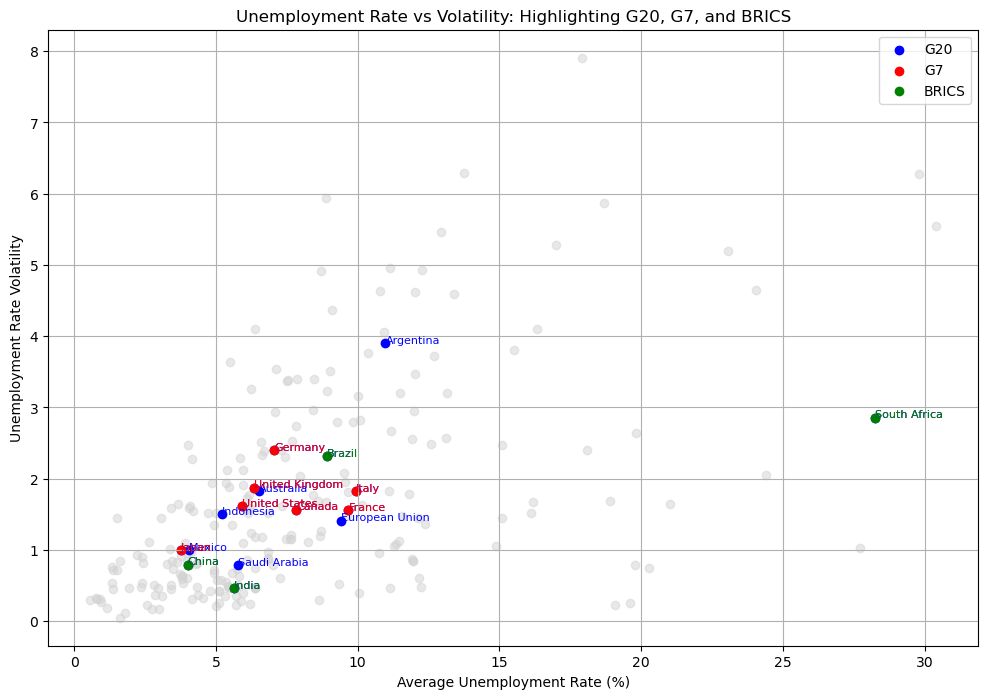

In [58]:
# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jsingh1998/Python_project/main/unemployment_analysis.csv'
df_unemp = pd.read_csv(file_path)

# Define the country groups
g20_countries = [
    "Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", 
    "Indonesia", "Italy", "Japan", "Mexico", "Russia", "Saudi Arabia", "South Africa", 
    "South Korea", "Turkey", "United Kingdom", "United States", "European Union"
]
g7_countries = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]
brics_countries = ["Brazil", "Russia", "India", "China", "South Africa"]

# Assuming the years are column names like '1991', '1992', etc.
years = [str(year) for year in range(1991, 2022)]

# Calculate the average unemployment rate and volatility (standard deviation)
df_unemp['Average Unemployment'] = df_unemp[years].mean(axis=1)
df_unemp['Unemployment Volatility'] = df_unemp[years].std(axis=1)

# Plotting the scatter plot with labels for specific groups
plt.figure(figsize=(12, 8))

# Plot all countries in a light color
plt.scatter(df_unemp['Average Unemployment'], df_unemp['Unemployment Volatility'], color='lightgray', alpha=0.5)

# Highlight and label G20 countries in blue
g20_data = df_unemp[df_unemp['Country Name'].isin(g20_countries)]
plt.scatter(g20_data['Average Unemployment'], g20_data['Unemployment Volatility'], color='blue', label='G20')
for index, row in g20_data.iterrows():
    plt.text(row['Average Unemployment'], row['Unemployment Volatility'], row['Country Name'], fontsize=8, color='blue')

# Highlight and label G7 countries in red
g7_data = df_unemp[df_unemp['Country Name'].isin(g7_countries)]
plt.scatter(g7_data['Average Unemployment'], g7_data['Unemployment Volatility'], color='red', label='G7')
for index, row in g7_data.iterrows():
    plt.text(row['Average Unemployment'], row['Unemployment Volatility'], row['Country Name'], fontsize=8, color='red')

# Highlight and label BRICS countries in green
brics_data = df_unemp[df_unemp['Country Name'].isin(brics_countries)]
plt.scatter(brics_data['Average Unemployment'], brics_data['Unemployment Volatility'], color='green', label='BRICS')
for index, row in brics_data.iterrows():
    plt.text(row['Average Unemployment'], row['Unemployment Volatility'], row['Country Name'], fontsize=8, color='green')

plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Unemployment Rate Volatility')
plt.title('Unemployment Rate vs Volatility: Highlighting G20, G7, and BRICS')
plt.legend()
plt.grid(True)
plt.show()

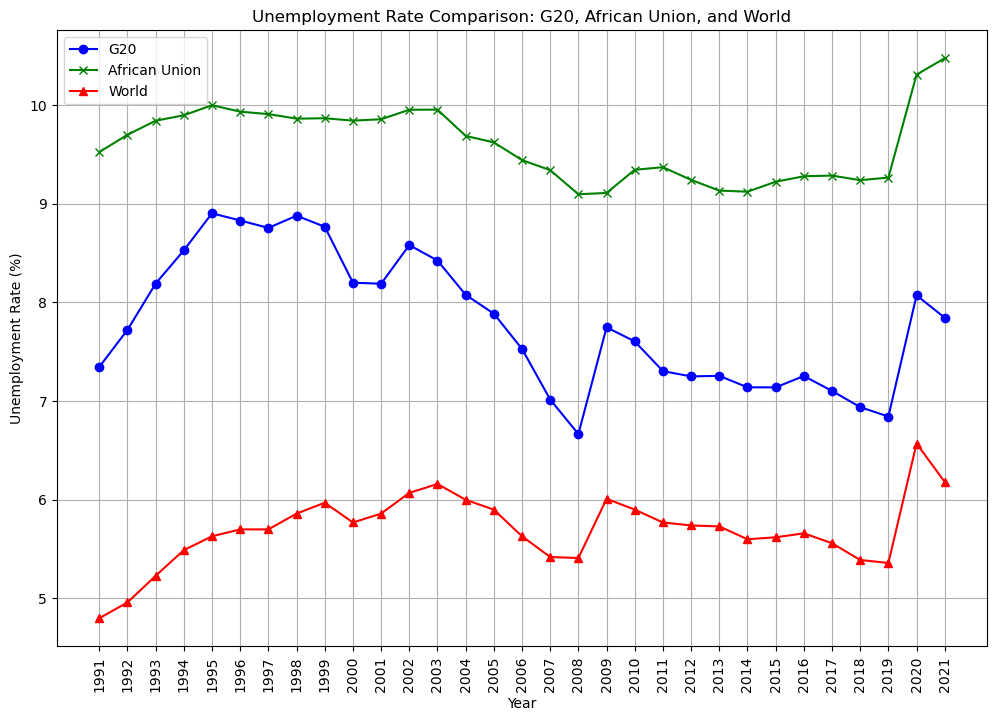

In [59]:
# Load the data from the uploaded file
file_path = 'https://raw.githubusercontent.com/jsingh1998/Python_project/main/unemployment_analysis.csv'
df_unemp = pd.read_csv(file_path)

# Define G20 and African Union countries
g20_countries = [
    "Argentina", "Australia", "Brazil", "Canada", "China", 
    "France", "Germany", "India", "Indonesia", "Italy", 
    "Japan", "Mexico", "Russian Federation", "Saudi Arabia", 
    "South Africa", "Korea, Rep.", "Turkey", "United Kingdom", 
    "United States"
]
african_union_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", 
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", 
    "Congo, Dem. Rep.", "Congo, Rep.", "Djibouti", "Egypt, Arab Rep.", 
    "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", 
    "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau", "Cote d'Ivoire", 
    "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", 
    "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", 
    "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", 
    "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", 
    "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

# Calculate average unemployment rates for G20 and African Union
g20_avg_unemp = df_unemp[df_unemp['Country Name'].isin(g20_countries)][years].mean()
au_avg_unemp = df_unemp[df_unemp['Country Name'].isin(african_union_countries)][years].mean()

# Extract 'World' unemployment data
world_unemp = df_unemp[df_unemp['Country Name'] == 'World'][years].transpose()
world_unemp.columns = ['World Unemployment Rate']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(years, g20_avg_unemp, color='blue', marker='o', label='G20')
plt.plot(years, au_avg_unemp, color='green', marker='x', label='African Union')
plt.plot(years, world_unemp['World Unemployment Rate'], color='red', marker='^', label='World')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Comparison: G20, African Union, and World')
plt.xticks(rotation='vertical')
plt.legend()
plt.grid(True)
plt.show()

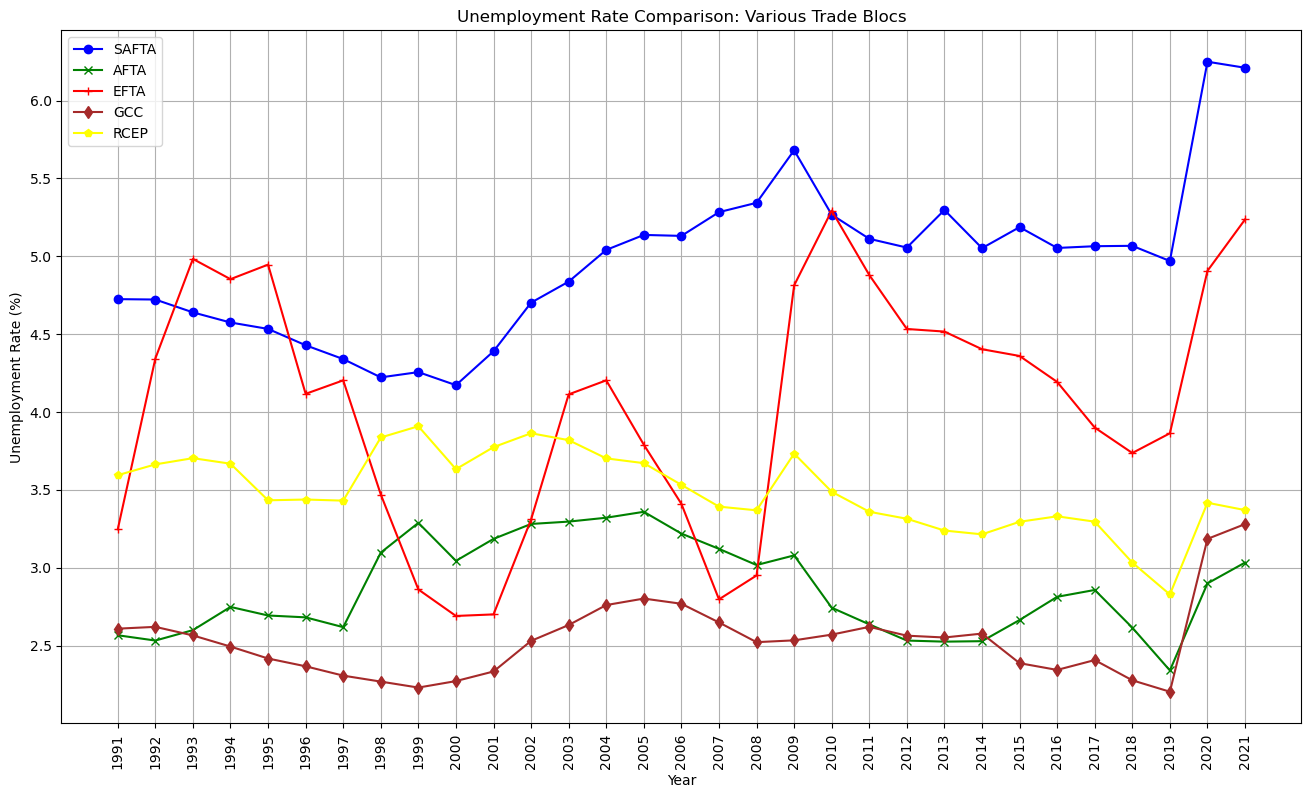

In [60]:
# Assuming the years are column names like '1991', '1992', etc.
years = [str(year) for year in range(1991, 2022)]

safta_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", 
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
afta_countries = [
    "Brunei Darussalam", "Cambodia", "Indonesia", "Lao PDR", 
    "Malaysia", "Myanmar", "Philippines", "Singapore", 
    "Thailand", "Vietnam"
]

# European Free Trade Association (EFTA) Countries
efta_countries = [
    "Iceland", "Liechtenstein", "Norway", "Switzerland"
]

# Gulf Cooperation Council (GCC) Countries
gcc_countries = [
    "Bahrain", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates"
]

# Regional Comprehensive Economic Partnership (RCEP) Countries
rcep_countries = [
    "Australia", "Brunei Darussalam", "Cambodia", "China", "Indonesia", 
    "Japan", "Lao PDR", "Malaysia", "Myanmar", "New Zealand", 
    "Philippines", "Singapore", "South Korea", "Thailand", "Vietnam"
]

safta_avg_unemp = df_unemp[df_unemp['Country Name'].isin(safta_countries)][years].mean()
afta_avg_unemp = df_unemp[df_unemp['Country Name'].isin(afta_countries)][years].mean()
efta_avg_unemp = df_unemp[df_unemp['Country Name'].isin(efta_countries)][years].mean()
gcc_avg_unemp = df_unemp[df_unemp['Country Name'].isin(gcc_countries)][years].mean()
rcep_avg_unemp = df_unemp[df_unemp['Country Name'].isin(rcep_countries)][years].mean()

# Plotting with all trade blocks
plt.figure(figsize=(16, 9))

# Existing trade blocks
plt.plot(years, safta_avg_unemp, color='blue', marker='o', label='SAFTA')
plt.plot(years, afta_avg_unemp, color='green', marker='x', label='AFTA')
plt.plot(years, efta_avg_unemp, color='red', marker='+', label='EFTA')
plt.plot(years, gcc_avg_unemp, color='brown', marker='d', label='GCC')
plt.plot(years, rcep_avg_unemp, color='yellow', marker='p', label='RCEP')

plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Comparison: Various Trade Blocs')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.legend()
plt.grid(True)
plt.show()


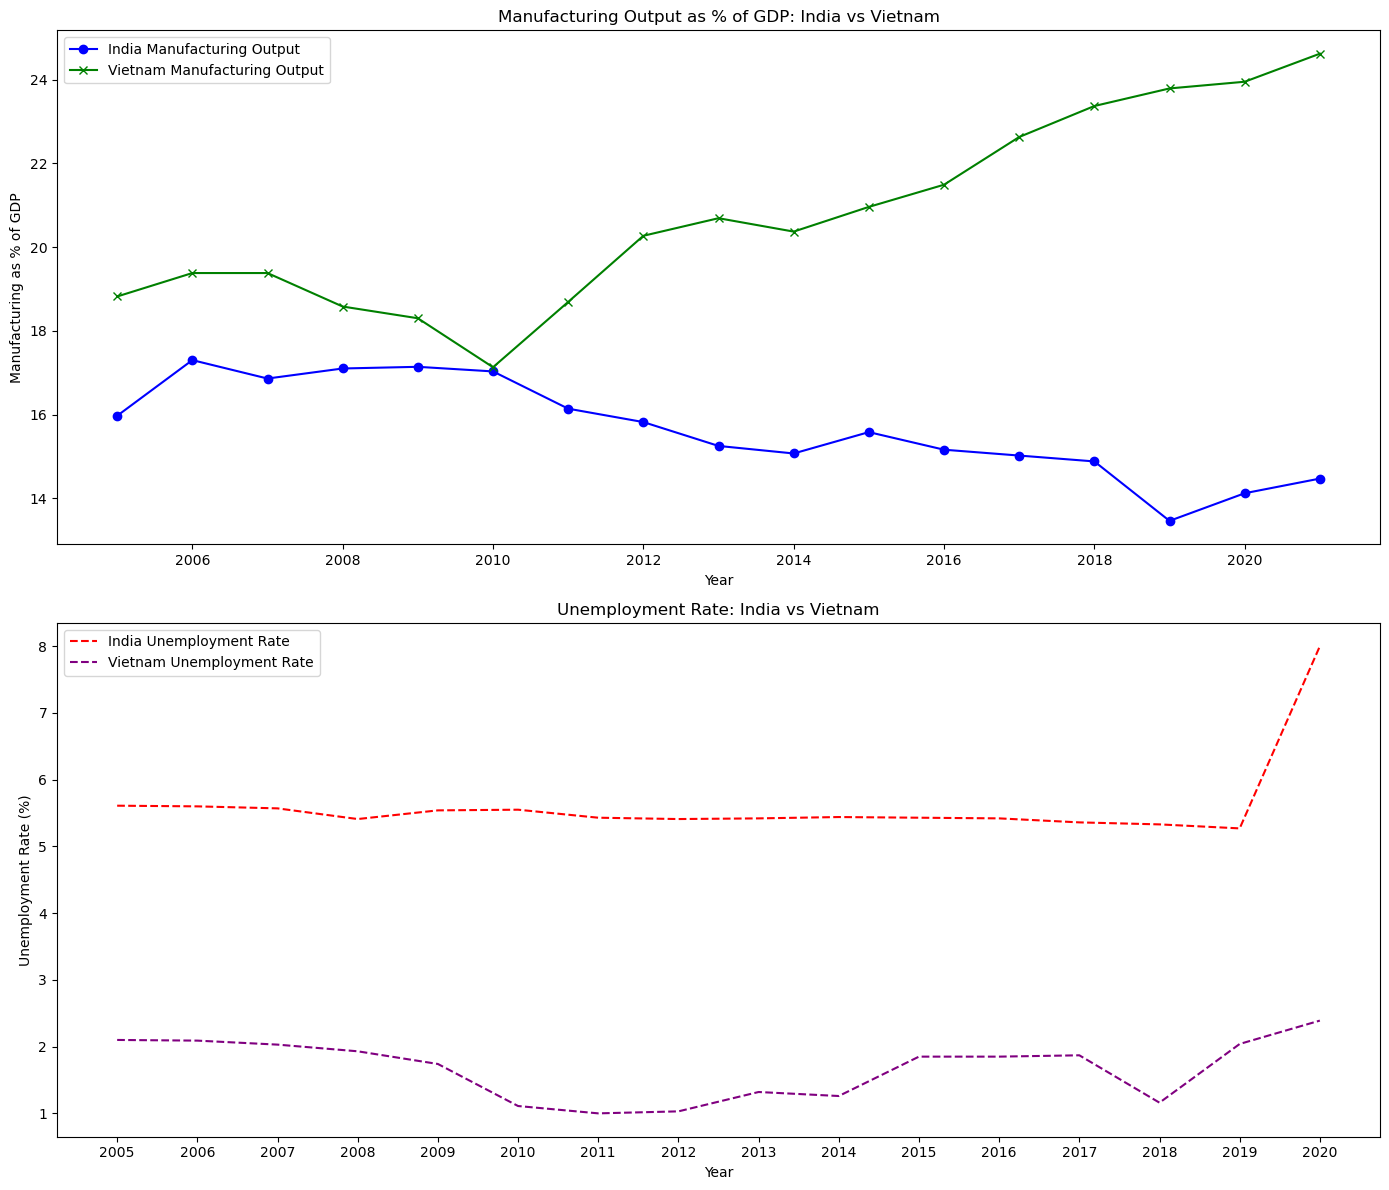

In [61]:
# Paths to the manufacturing output CSV files
india_csv = "https://raw.githubusercontent.com/sriramganesh05/python_project/main/india_manufacturing_output.csv"
vietnam_csv = "https://raw.githubusercontent.com/sriramganesh05/python_project/main/vietnam_manufacturing_output.csv"

# Read the manufacturing data
india_manufacturing = pd.read_csv(india_csv)
vietnam_manufacturing = pd.read_csv(vietnam_csv)

# Extract unemployment data for India and Vietnam from df_unemp
india_unemployment = df_unemp[df_unemp['Country Name'] == 'India']
vietnam_unemployment = df_unemp[df_unemp['Country Name'] == 'Vietnam']

# Assuming the unemployment data has years as columns like '1991', '1992', etc.
years = [str(year) for year in range(2005, 2021)]
india_unemployment_rates = india_unemployment[years].mean(axis=0)
vietnam_unemployment_rates = vietnam_unemployment[years].mean(axis=0)

# Creating a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plotting manufacturing output
axs[0].plot(india_manufacturing['Year'], india_manufacturing['% of GDP'], color='blue', marker='o', label='India Manufacturing Output')
axs[0].plot(vietnam_manufacturing['Year'], vietnam_manufacturing['% of GDP'], color='green', marker='x', label='Vietnam Manufacturing Output')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Manufacturing as % of GDP')
axs[0].set_title('Manufacturing Output as % of GDP: India vs Vietnam')
axs[0].legend()

# Plotting unemployment rates
axs[1].plot(years, india_unemployment_rates, color='red', linestyle='dashed', label='India Unemployment Rate')
axs[1].plot(years, vietnam_unemployment_rates, color='purple', linestyle='dashed', label='Vietnam Unemployment Rate')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Unemployment Rate (%)')
axs[1].set_title('Unemployment Rate: India vs Vietnam')
axs[1].legend()

plt.tight_layout()
plt.show()


# Time series Forecasting

In [62]:
df_f = pd.read_csv('https://raw.githubusercontent.com/jsingh1998/Python_project/main/us_unemp.csv')
df_f.head()

,DATE,UNRATE
0,2010,9.8
1,2010,9.8
2,2010,9.9
3,2010,9.9
4,2010,9.6


In [4]:
df_f.set_index('DATE', inplace = True)

<Axes: xlabel='DATE'>

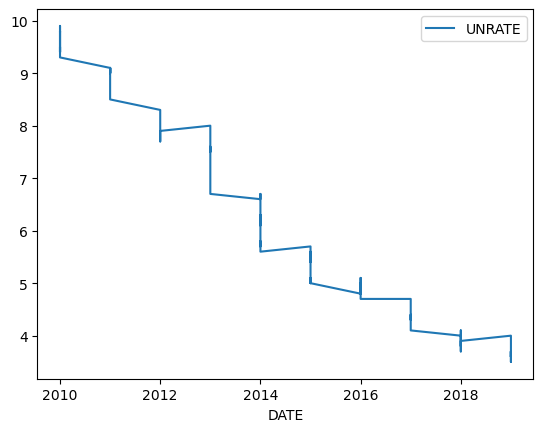

In [5]:
df_f.plot()

<Axes: xlabel='DATE'>

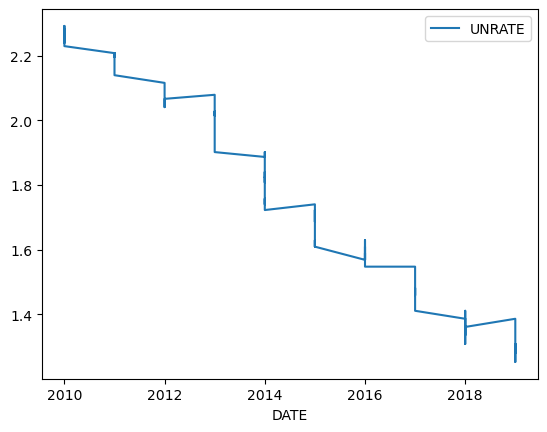

In [6]:
df_log = np.log(df_f)

df_log.plot()

In [29]:
split_percentage = 0.8
split_point = int(len(df_f) * split_percentage)

# Split the data into training and testing sets
df_train = df_f.iloc[:split_point]
df_test = df_f.iloc[split_point:]

# Step 1: Check for stationarity of time series

# Method: ACF plot and PACF plot

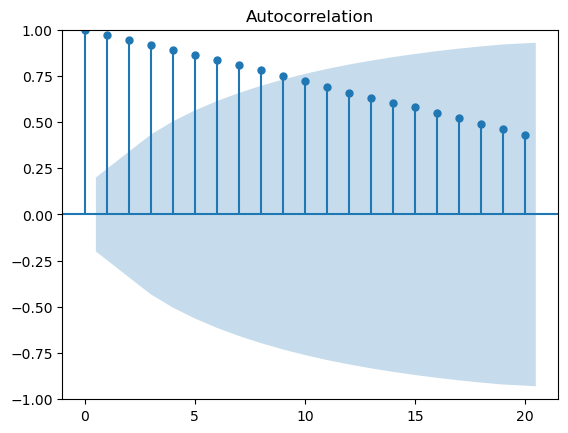

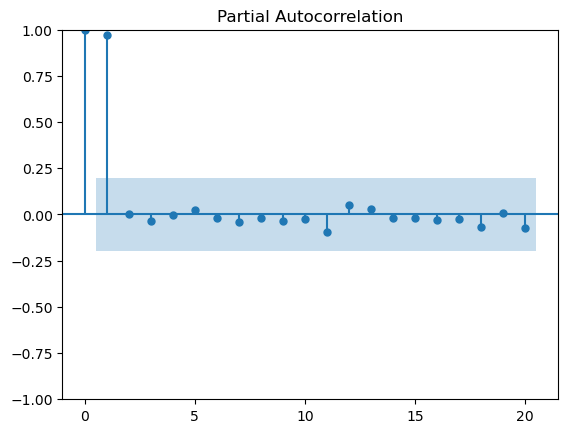

In [31]:
acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [34]:
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.676812124847063


# Transform to stationary: differencing

<Axes: xlabel='DATE'>

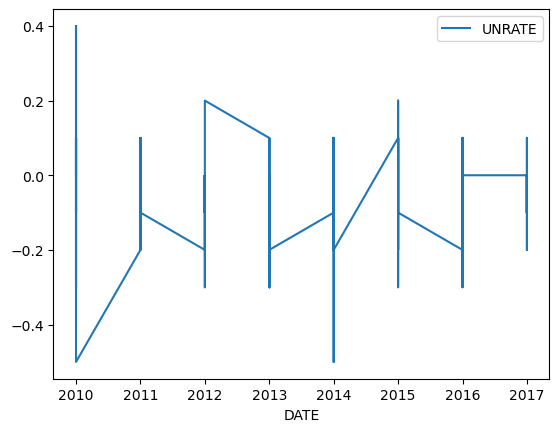

In [35]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot() 

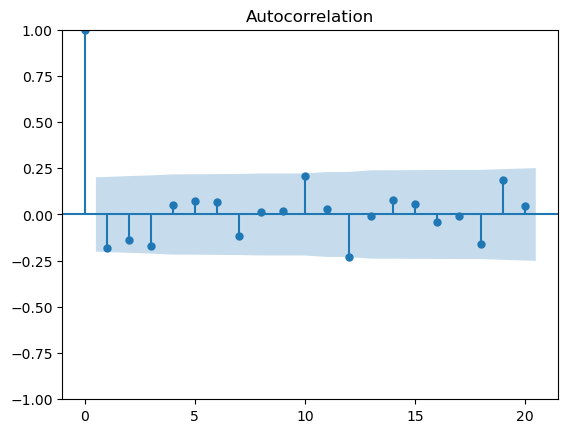

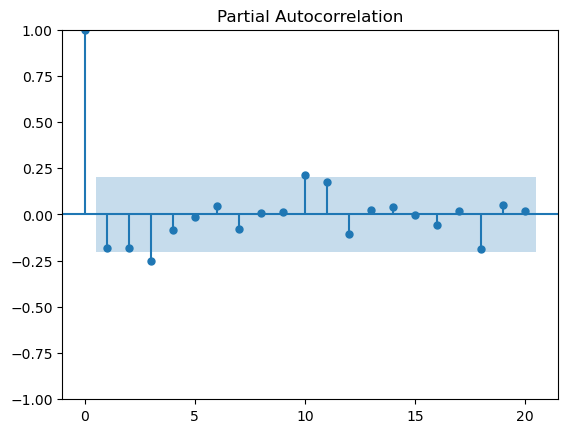

In [36]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [37]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.9204588733955935e-13


In [39]:
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

for param in pdq:
        model_arima = sm.tsa.arima.model.ARIMA(df_train, order = param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)

/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was prov

(0, 0, 0) 394.025167696845
(0, 0, 1) 276.886586189123
(0, 0, 2) 188.06111093666237
(0, 0, 3) 129.13640186728443
(0, 0, 4) 86.55870803271863
(0, 1, 0) -79.85052721821017
(0, 1, 1) -77.86505523340105
(0, 1, 2) -75.92632928039893


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(0, 1, 3) -73.92792642481244
(0, 1, 4) -74.830918937115
(0, 2, 0) -11.843670943621081
(0, 2, 1) -86.22430170747273
(0, 2, 2) -89.20871581534493
(0, 2, 3) -91.68110797555228


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was prov

(0, 2, 4) -89.90828444219413
(0, 3, 0) 92.57211460586203
(0, 3, 1) -4.156119230637536
(0, 3, 2) -72.56322711462484
(0, 3, 3) -74.13631134152145
(0, 3, 4) -77.20484722288735
(0, 4, 0) 203.95609949633345
(0, 4, 1) 99.13024469359391
(0, 4, 2) 7.478958152695615
(0, 4, 3) -54.0748569085246


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was prov

(0, 4, 4) -55.12318430836254
(1, 0, 0) -71.03632484836736
(1, 0, 1) -69.0484706865025
(1, 0, 2) -67.05493401725012
(1, 0, 3) -65.11650627082943


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was prov

(1, 0, 4) -66.0007518158634
(1, 1, 0) -77.86591232552877
(1, 1, 1) -76.22343525913833
(1, 1, 2) -73.92646634714022
(1, 1, 3) -92.97593094282854
(1, 1, 4) -92.71175238587949
(1, 2, 0) -39.310958083857486
(1, 2, 1) -87.11047852796308
(1, 2, 2) -91.60700921535145
(1, 2, 3) -87.01952493060176


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was prov

(1, 2, 4) -89.44325027257868
(1, 3, 0) 36.95445211653039
(1, 3, 1) -30.493040121178694
(1, 3, 2) -72.84782709240669


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

(1, 3, 3) -69.3988158233662
(1, 3, 4) -71.7948216582184
(1, 4, 0) 123.71852446622968


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(1, 4, 1) 45.1567785869323
(1, 4, 2) -17.34796502309681


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: 

(1, 4, 3) -54.01441009463562
(1, 4, 4) -50.88321638965822


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(2, 0, 0) -69.04922159458764
(2, 0, 1) -68.01047196801898


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

(2, 0, 2) -66.07471470186758
(2, 0, 3) -64.20843262445109
(2, 0, 4) -81.18058597228979
(2, 1, 0) -75.94831298047022
(2, 1, 1) -73.94892651507001


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

(2, 1, 2) -83.82454256779785
(2, 1, 3) -87.78163614100804
(2, 1, 4) -90.8093877235434
(2, 2, 0) -47.54454350585518


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: 

(2, 2, 1) -87.8753695026488
(2, 2, 2) -84.57100719881119


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

(2, 2, 3) -82.35364792295563
(2, 2, 4) -87.50991280378116
(2, 3, 0) 18.48715898664193
(2, 3, 1) -38.069606070859216
(2, 3, 2) -28.516169911042468
(2, 3, 3) -70.21900533300098


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Ma

(2, 3, 4) -66.10231030387635
(2, 4, 0) 93.43037885129218
(2, 4, 1) 27.648232116358596
(2, 4, 2) -24.139313581742456
(2, 4, 3) -15.337201029227227


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Ma

(2, 4, 4) -50.39929062321902
(3, 0, 0) -67.13908065079386
(3, 0, 1) -65.52663263424574
(3, 0, 2) -64.76984519524106


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

(3, 0, 3) -63.11646218479123
(3, 0, 4) -79.65668963899273
(3, 1, 0) -73.9483586767298


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

(3, 1, 1) -88.63941008038519
(3, 1, 2) -85.32984506795073
(3, 1, 3) -84.96161687305592


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(3, 1, 4) -88.91063825499647
(3, 2, 0) -60.389128302967364
(3, 2, 1) -91.7745746016789
(3, 2, 2) -90.15311303450932
(3, 2, 3) -85.36494024452833
(3, 2, 4) -86.68076088023582
(3, 3, 0) 1.2755957320826434
(3, 3, 1) -50.109168767789626


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.p

(3, 3, 2) -76.57464807123728
(3, 3, 3) -69.18741647326439


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(3, 3, 4) -68.08420571474414
(3, 4, 0) 70.53169900085982
(3, 4, 1) 11.354299401829067


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

(3, 4, 2) -33.339720879995724
(3, 4, 3) -20.92599876446728


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(3, 4, 4) -13.292358569519326
(4, 0, 0) -65.13940872691968
(4, 0, 1) -63.577709739000994


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

(4, 0, 2) -63.18449833247762
(4, 0, 3) -62.871611623018865


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(4, 0, 4) -61.562794540896874
(4, 1, 0) -75.19675972970103
(4, 1, 1) -92.65897932320455


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

(4, 1, 2) -91.0143348355339
(4, 1, 3) -88.66353601068485


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(4, 1, 4) -88.17116764540727
(4, 2, 0) -69.3719509275698
(4, 2, 1) -90.5636455080094


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

(4, 2, 2) -88.68502908599976
(4, 2, 3) -86.66227078353934


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(4, 2, 4) -84.73418170853331
(4, 3, 0) -12.12899013504365
(4, 3, 1) -58.38101709964262


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-in

(4, 3, 2) -49.006538291599185
(4, 3, 3) -74.57890469286282


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupp

(4, 3, 4) -71.19437734474431
(4, 4, 0) 54.58245590621741
(4, 4, 1) -1.2190140225485493
(4, 4, 2) 12.231076602226265
(4, 4, 3) -33.998982573349075


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Ma

(4, 4, 4) -23.465138029275103


/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Step 2: Determine ARIMA models parameters p, q

# Step 3: Fit the ARIMA model

In [40]:
model = ARIMA(df_train, order=(1,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 UNRATE   No. Observations:                   96
Model:                 ARIMA(1, 1, 3)   Log Likelihood                  51.488
Date:                Fri, 15 Dec 2023   AIC                            -92.976
Time:                        22:56:05   BIC                            -80.207
Sample:                             0   HQIC                           -87.816
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9934      0.012     83.020      0.000       0.970       1.017
ma.L1         -1.2849      0.087    -14.753      0.000      -1.456      -1.114
ma.L2          0.1090      0.150      0.728      0.4

/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Step 4: Make time series predictions

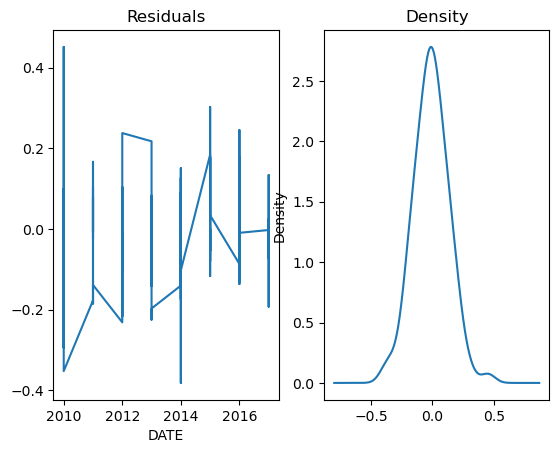

In [41]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

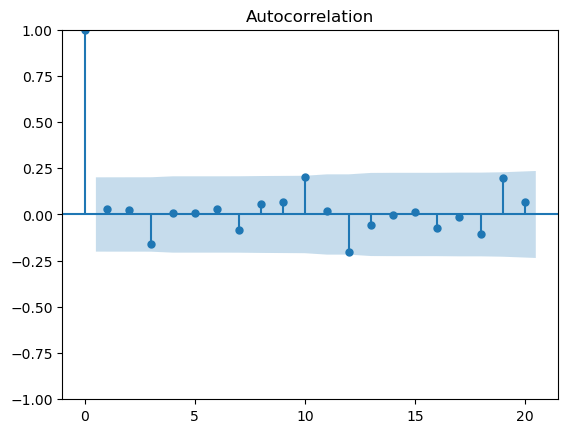

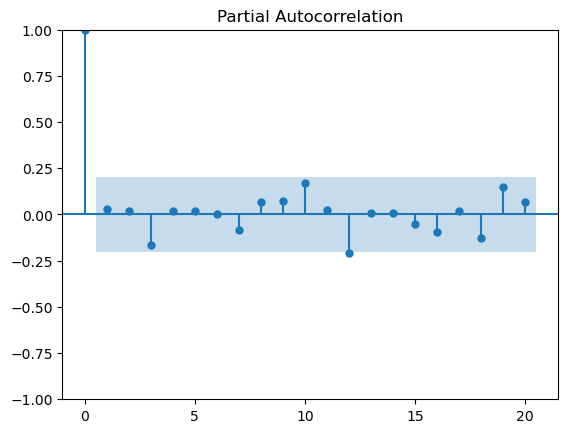

In [42]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='DATE'>

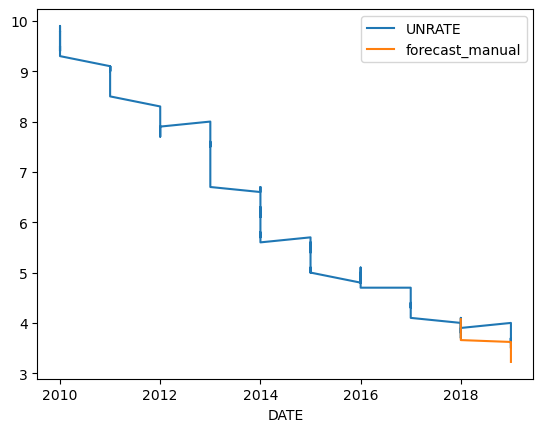

In [44]:
forecast_test = model_fit.forecast(len(df_test))

df_f['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df_f.plot()

# Auto-fit the ARIMA model

In [46]:
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True)

In [47]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 1, 0)   Log Likelihood                  54.776
Date:                Fri, 15 Dec 2023   AIC                            -99.551
Time:                        22:58:20   BIC                            -86.782
Sample:                             0   HQIC                           -94.391
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1068      0.016     -6.721      0.000      -0.138      -0.076
ar.L1         -0.2649      0.091     -2.906      0.004      -0.443      -0.086
ar.L2         -0.2385      0.110     -2.163      0.031      -0.455      -0.022
ar.L3         -0.2542      0.118     -2.148      0.032      -0.486      -0.022
sigma2         0.0184      0.002      7.831      0.000       0.014       0.023
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.43
Prob(Q):                              0.84   Prob(JB):                         0.04
Heteroskedasticity (H):               0.57   Skew:                             0.21
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 5: Evaluate model predictions

/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/susanoo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='DATE'>

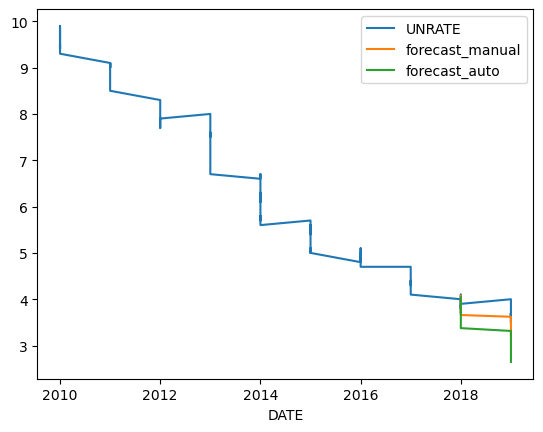

In [48]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_f['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df_f.plot()

In [50]:
mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.1706671111922954
mape - manual: 0.04568193844131607
rmse - manual: 0.2078108340934406


In [51]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.44591402296272875
mape - auto: 0.12003643089765366
rmse - auto: 0.5335821307744302
